In [168]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [169]:
df=pd.read_csv('/content/dataset.csv')
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [170]:
df.drop('policy_id',axis=1,inplace=True)

In [171]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

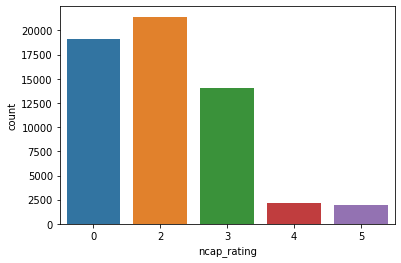

In [172]:
sn.countplot(x='ncap_rating',data=df)

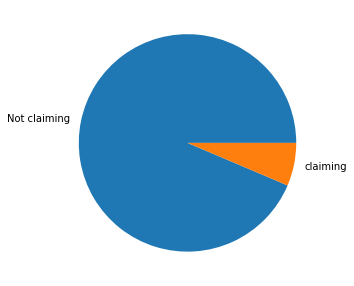

In [173]:
plt.figure(figsize=(5,5))
plt.pie(df['is_claim'].value_counts()/len(df)*100,labels=['Not claiming','claiming'])
plt.show()

It is not data analitics. We need to classify it with neural networks.



In [174]:
df=df.apply(LabelEncoder().fit_transform)

In [175]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,26642,5,37,0,3,0,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,32629,2,9,11,15,0,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,36984,2,10,15,2,0,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,38576,11,15,16,14,0,3,3,2,0,...,1,1,1,1,1,1,1,1,1,0
4,30237,11,36,17,17,1,0,4,2,8,...,0,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,21104,13,37,20,8,1,0,4,2,8,...,0,1,1,1,0,1,1,1,1,0
58588,55398,2,24,5,7,0,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
58589,52917,5,17,17,17,0,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
58590,57681,14,28,20,8,0,2,7,2,0,...,1,1,1,1,1,1,1,1,1,0


In [176]:
df.corrwith(df['is_claim']).abs().sort_values(ascending=False)

is_claim                            1.000000
policy_tenure                       0.077128
age_of_car                          0.028204
age_of_policyholder                 0.022435
max_torque                          0.014390
is_adjustable_steering              0.013917
cylinder                            0.013434
is_front_fog_lights                 0.011825
population_density                  0.011195
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
fuel_type                           0.009612
steering_type                       0.009608
area_cluster                        0.009425
displacement                        0.008511
is_parking_sensors                  0.008419
width                               0.008083
is_day_night_rear_view_mirror       0.007989
max_power                           0.007573
is_speed_alert                      0.007307
length                              0.007052
is_ecw                              0.006637
is_central

In [177]:
X=df[['policy_tenure','age_of_car','age_of_policyholder','max_torque','is_adjustable_steering','cylinder','is_front_fog_lights','population_density','is_brake_assist','is_brake_assist']].copy()
y=df[['is_claim']]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [179]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
N, D = X_train.shape

In [181]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [182]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [183]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).values.reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).values.reshape(-1, 1))

In [185]:
n_epochs = 1000

In [186]:
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

In [187]:
for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    # GET TEST LOSS
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    
    # save
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()
    
    if (i+1) % 50 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.7106, Test Loss: 0.7110
Epoch 100/1000, Train Loss: 0.6796, Test Loss: 0.6798
Epoch 150/1000, Train Loss: 0.6531, Test Loss: 0.6531
Epoch 200/1000, Train Loss: 0.6296, Test Loss: 0.6294
Epoch 250/1000, Train Loss: 0.6083, Test Loss: 0.6081
Epoch 300/1000, Train Loss: 0.5889, Test Loss: 0.5886
Epoch 350/1000, Train Loss: 0.5709, Test Loss: 0.5707
Epoch 400/1000, Train Loss: 0.5542, Test Loss: 0.5540
Epoch 450/1000, Train Loss: 0.5385, Test Loss: 0.5383
Epoch 500/1000, Train Loss: 0.5236, Test Loss: 0.5235
Epoch 550/1000, Train Loss: 0.5096, Test Loss: 0.5095
Epoch 600/1000, Train Loss: 0.4962, Test Loss: 0.4962
Epoch 650/1000, Train Loss: 0.4835, Test Loss: 0.4836
Epoch 700/1000, Train Loss: 0.4714, Test Loss: 0.4715
Epoch 750/1000, Train Loss: 0.4599, Test Loss: 0.4601
Epoch 800/1000, Train Loss: 0.4489, Test Loss: 0.4491
Epoch 850/1000, Train Loss: 0.4384, Test Loss: 0.4387
Epoch 900/1000, Train Loss: 0.4285, Test Loss: 0.4288
Epoch 950/1000, Train Loss: 0

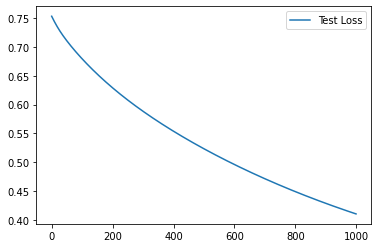

In [196]:
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [189]:
# Checkick accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train) * 100.0
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test) * 100.0
print(f'Training accuracy: {train_acc:.4f}%, Test accuracy: {test_acc:.4f}%')

Training accuracy: 93.6239%, Test accuracy: 93.5612%


In [190]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0933, -0.0516,  0.0103, -0.0119, -0.0017,  0.0389, -0.0508, -0.0134,
                       -0.0512,  0.0751]])),
             ('0.bias', tensor([-0.8466]))])

In [191]:
torch.save(model.state_dict(), 'mymodel.pt')